In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import joblib
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

# **Đọc dữ liệu**

In [93]:
data = pd.read_csv('HN_Houseprice.csv')

In [94]:
# data.to_csv('Houseprice-utf8.csv', encoding='utf-8-sig')
data.head(5)

,Title,Address,District,PostingDate,PostType,Price,Area,Direction,Bedrooms,Bathrooms,Floors,Width_meters,Legal,Interior,Entrancewidth
0,Top 10 căn đầu tư tốt nhất tại Vinhome Cổ Loa ...,"Dự án Vinhomes Cổ Loa, Đường Cổ Loa, Xã Đông H...",Đông Anh,16/12/2024,"Nhà biệt thự, liền kề tại Vinhomes Cổ Loa",15 tỷ,63 m²,0,0,0,5 tầng,0,0,0,0
1,Tổng kho hàng chuyển nhượng vị trí đẹp giá rẻ ...,"Dự án An Lạc Green Symphony, Đường Vành Đai 3....",Hoài Đức,16/12/2024,"Nhà biệt thự, liền kề tại An Lạc Green Symphony","21,5 tỷ",90 m²,Tây - Nam,0,0,4 tầng,5 m,* Pháp lý: Tất cả các căn đã ký Hợp đồng mua bán.,0,58 m
2,CĐT mở bán quỹ căn HOT cuối cùng đẹp nhất The ...,"The Diamond Residence, 25 Đường Lê Văn Lương, ...",Thanh Xuân,16/12/2024,Căn hộ chung cư tại The Diamond Residence,Thỏa thuận,107 m²,0,3 phòng,3 phòng,0,0,Hợp đồng mua bán,0,0
3,Bán biệt thự song lập 150m2 Vin Ocean Park Gia...,"Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",Gia Lâm,16/12/2024,"Nhà biệt thự, liền kề tại Vinhomes Ocean Park ...",26 tỷ,150 m²,0,0,0,0,0,Sổ đỏ.,0,0
4,Tạo ngay ra dòng tiền 360 triệu/năm với số vốn...,"Dự án Vinhomes Golden Avenue Móng Cái, Phường ...",Móng Cái,16/12/2024,"Nhà biệt thự, liền kề tại Vinhomes Golden Aven...",6 tỷ,90 m²,0,0,0,5 tầng,5 m,Sổ đỏ/ Sổ hồng,0,"17,5 m"


# **Xử lý dữ liệu**

**1. Xử lý thông tin : Cummune (Xã/Phường), District (Quận/Huyện), PostType (Loại hình)**

In [95]:
data = data[data['PostingDate'] != '0']
data = data[data['Price'] != 'Thỏa thuận']
# Tạo ra để check thay đổi dữ liệu
data2 = data[data['PostingDate'] != '0']
data2 = data[data['Price'] != 'Thỏa thuận']
data.head()

,Title,Address,District,PostingDate,PostType,Price,Area,Direction,Bedrooms,Bathrooms,Floors,Width_meters,Legal,Interior,Entrancewidth
0,Top 10 căn đầu tư tốt nhất tại Vinhome Cổ Loa ...,"Dự án Vinhomes Cổ Loa, Đường Cổ Loa, Xã Đông H...",Đông Anh,16/12/2024,"Nhà biệt thự, liền kề tại Vinhomes Cổ Loa",15 tỷ,63 m²,0,0,0,5 tầng,0,0,0,0
1,Tổng kho hàng chuyển nhượng vị trí đẹp giá rẻ ...,"Dự án An Lạc Green Symphony, Đường Vành Đai 3....",Hoài Đức,16/12/2024,"Nhà biệt thự, liền kề tại An Lạc Green Symphony","21,5 tỷ",90 m²,Tây - Nam,0,0,4 tầng,5 m,* Pháp lý: Tất cả các căn đã ký Hợp đồng mua bán.,0,58 m
3,Bán biệt thự song lập 150m2 Vin Ocean Park Gia...,"Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",Gia Lâm,16/12/2024,"Nhà biệt thự, liền kề tại Vinhomes Ocean Park ...",26 tỷ,150 m²,0,0,0,0,0,Sổ đỏ.,0,0
4,Tạo ngay ra dòng tiền 360 triệu/năm với số vốn...,"Dự án Vinhomes Golden Avenue Móng Cái, Phường ...",Móng Cái,16/12/2024,"Nhà biệt thự, liền kề tại Vinhomes Golden Aven...",6 tỷ,90 m²,0,0,0,5 tầng,5 m,Sổ đỏ/ Sổ hồng,0,"17,5 m"
6,"Quỹ căn hộ Studio, 1N, 2N, 3N chính chủ gửi bá...","Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",Gia Lâm,11/12/2024,Căn hộ chung cư tại Vinhomes Ocean Park Gia Lâm,"2,2 tỷ",43 m²,Tây,1 phòng,1 phòng,0,0,Sổ đỏ/ Sổ hồng,Đầy đủ.,0


In [96]:
# Hàm trích xuất từ "Phường" hoặc "Xã"
import unicodedata

def extract_commune_clean(row):
    district = row['District']
    address = row['Address']
    
    # Kiểm tra nếu district có trong address
    if district in address:
        # Lấy phần trước giá trị của District trong Address
        parts = address.split(f", {district}")
        
        if len(parts) > 0:
            # Lấy phần tử cuối cùng trước District
            before_district = parts[0].strip()
            
            # Loại bỏ các từ "Phường", "Xã", "Thị trấn" (cả chữ hoa và chữ thường)
            commune = before_district.split(",")[-1].strip()
            commune = commune.replace("Phường ", "").replace("Xã ", "").replace("Thị trấn ", "").replace("phường ", "").replace("xã ", "").replace("thị trấn ", "")
            
            # Nếu không tìm thấy giá trị hợp lệ, lấy 2 từ cuối cùng
            if not commune:
                words = before_district.split()
                if len(words) >= 2:
                    commune = f"{words[-2]} {words[-1]}"  # Lấy hai từ cuối cùng

            # Loại bỏ các tỉnh/thành phố lớn (nếu cần)
            if commune in ['Hà Nội', 'Hồ Chí Minh', 'Đà Nẵng', 'Hải Phòng']:  # Có thể thêm các tỉnh khác
                return None 
            
            # Chuẩn hóa Unicode và chuẩn hóa chữ
            commune = unicodedata.normalize('NFC', commune)
            return commune.lower().title()
    
    return None

# Hàm kiểm tra Province trong Address và lọc dữ liệu chỉ giữ lại "Hà Nội"
def filter_by_province(df, province="Hà Nội"):
    # Bỏ dấu '.' nếu có ở cuối địa chỉ
    df['Address'] = df['Address'].apply(lambda x: x.rstrip('.') if isinstance(x, str) else x)
    # Lấy tỉnh/thành phố từ địa chỉ (từ sau dấu phẩy cuối cùng)
    df['Province'] = df['Address'].apply(lambda x: x.split(",")[-1].strip())
    # Lọc các dòng có Province là "Hà Nội"
    filtered_data = df[df['Province'] == province].drop(columns=['Province'])
    return filtered_data
    
# Áp dụng lọc các tin đăng bán ở Hà Nội
data = filter_by_province(data)

# Áp dụng hàm để cập nhật cột Commune
data['Commune'] = data.apply(extract_commune_clean, axis=1)

# Đưa cột 'Commune' lên trước cột 'District'
columns = list(data.columns)
columns.remove("Commune")
columns.insert(columns.index("District"), "Commune")

data = data[columns]
data.head()

,Title,Address,Commune,District,PostingDate,PostType,Price,Area,Direction,Bedrooms,Bathrooms,Floors,Width_meters,Legal,Interior,Entrancewidth
0,Top 10 căn đầu tư tốt nhất tại Vinhome Cổ Loa ...,"Dự án Vinhomes Cổ Loa, Đường Cổ Loa, Xã Đông H...",Đông Hội,Đông Anh,16/12/2024,"Nhà biệt thự, liền kề tại Vinhomes Cổ Loa",15 tỷ,63 m²,0,0,0,5 tầng,0,0,0,0
1,Tổng kho hàng chuyển nhượng vị trí đẹp giá rẻ ...,"Dự án An Lạc Green Symphony, Đường Vành Đai 3....",Vân Canh,Hoài Đức,16/12/2024,"Nhà biệt thự, liền kề tại An Lạc Green Symphony","21,5 tỷ",90 m²,Tây - Nam,0,0,4 tầng,5 m,* Pháp lý: Tất cả các căn đã ký Hợp đồng mua bán.,0,58 m
3,Bán biệt thự song lập 150m2 Vin Ocean Park Gia...,"Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",Dương Xá,Gia Lâm,16/12/2024,"Nhà biệt thự, liền kề tại Vinhomes Ocean Park ...",26 tỷ,150 m²,0,0,0,0,0,Sổ đỏ.,0,0
6,"Quỹ căn hộ Studio, 1N, 2N, 3N chính chủ gửi bá...","Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",Dương Xá,Gia Lâm,11/12/2024,Căn hộ chung cư tại Vinhomes Ocean Park Gia Lâm,"2,2 tỷ",43 m²,Tây,1 phòng,1 phòng,0,0,Sổ đỏ/ Sổ hồng,Đầy đủ.,0
7,Quỹ căn đặc biệt dự án Viha Complex - Viha Lec...,"Viha Complex, 107, Đường Nguyễn Tuân, Phường T...",Thanh Xuân Trung,Thanh Xuân,16/12/2024,Căn hộ chung cư tại Viha Complex,83 triệu/m²,"72,11 m²",0,2 phòng,0,0,0,0,0,0


In [97]:
# # Lọc dữ liệu với giá trị chứa 'hàng bồ' trong cột Commune (không phân biệt hoa thường)
# filtered_data = data[data['Commune'].str.contains('hàng bồ', case=False, na=False)]

# # Đếm tần suất xuất hiện của từng giá trị trong DataFrame lọc
# a = filtered_data.value_counts()
# a = pd.DataFrame(a)
# a

In [98]:
# b = data['Commune'].value_counts()
# b

In [99]:
#Check thay đổi dữ liệu
data3 = data2[~data2['Title'].isin(data['Title'])]
data3.head()

,Title,Address,District,PostingDate,PostType,Price,Area,Direction,Bedrooms,Bathrooms,Floors,Width_meters,Legal,Interior,Entrancewidth
4,Tạo ngay ra dòng tiền 360 triệu/năm với số vốn...,"Dự án Vinhomes Golden Avenue Móng Cái, Phường ...",Móng Cái,16/12/2024,"Nhà biệt thự, liền kề tại Vinhomes Golden Aven...",6 tỷ,90 m²,0,0,0,5 tầng,5 m,Sổ đỏ/ Sổ hồng,0,"17,5 m"
26,Tạo ngay ra dòng tiền 360 triệu/năm với số vốn...,"Dự án Vinhomes Golden Avenue Móng Cái, Phường ...",Móng Cái,16/12/2024,"Nhà biệt thự, liền kề tại Vinhomes Golden Aven...",6 tỷ,90 m²,0,0,0,5 tầng,5 m,Sổ đỏ/ Sổ hồng,0,"17,5 m"
48,Tạo ngay ra dòng tiền 360 triệu/năm với số vốn...,"Dự án Vinhomes Golden Avenue Móng Cái, Phường ...",Móng Cái,16/12/2024,"Nhà biệt thự, liền kề tại Vinhomes Golden Aven...",6 tỷ,90 m²,0,0,0,5 tầng,5 m,Sổ đỏ/ Sổ hồng,0,"17,5 m"
70,Tạo ngay ra dòng tiền 360 triệu/năm với số vốn...,"Dự án Vinhomes Golden Avenue Móng Cái, Phường ...",Móng Cái,16/12/2024,"Nhà biệt thự, liền kề tại Vinhomes Golden Aven...",6 tỷ,90 m²,0,0,0,5 tầng,5 m,Sổ đỏ/ Sổ hồng,0,"17,5 m"
92,Tạo ngay ra dòng tiền 360 triệu/năm với số vốn...,"Dự án Vinhomes Golden Avenue Móng Cái, Phường ...",Móng Cái,16/12/2024,"Nhà biệt thự, liền kề tại Vinhomes Golden Aven...",6 tỷ,90 m²,0,0,0,5 tầng,5 m,Sổ đỏ/ Sổ hồng,0,"17,5 m"


In [100]:
# Hàm lọc và thay thế giá trị trong cột 'PostType' với các từ khóa tương ứng
def filter_and_replace_posttype(row):
    post_type = str(row['PostType']).lower().strip()  
    if any(keyword in post_type for keyword in ['đất', 'mảnh đất']):
        return 'Đất'
    elif any(keyword in post_type for keyword in ['chung cư', 'căn hộ']):
        return 'Chung cư'
    elif any(keyword in post_type for keyword in ['nhà', 'biệt thự']):
        return 'Nhà'
    return None

# Thay thế dữ liệu trong cột 'PostType' và lọc ra các dòng có PostType chứa các từ khóa
data['PostType'] = data.apply(filter_and_replace_posttype, axis=1)

# Lọc ra các dòng có 'PostType' không phải None
data = data[data['PostType'].notna()]
data.head()

,Title,Address,Commune,District,PostingDate,PostType,Price,Area,Direction,Bedrooms,Bathrooms,Floors,Width_meters,Legal,Interior,Entrancewidth
0,Top 10 căn đầu tư tốt nhất tại Vinhome Cổ Loa ...,"Dự án Vinhomes Cổ Loa, Đường Cổ Loa, Xã Đông H...",Đông Hội,Đông Anh,16/12/2024,Nhà,15 tỷ,63 m²,0,0,0,5 tầng,0,0,0,0
1,Tổng kho hàng chuyển nhượng vị trí đẹp giá rẻ ...,"Dự án An Lạc Green Symphony, Đường Vành Đai 3....",Vân Canh,Hoài Đức,16/12/2024,Nhà,"21,5 tỷ",90 m²,Tây - Nam,0,0,4 tầng,5 m,* Pháp lý: Tất cả các căn đã ký Hợp đồng mua bán.,0,58 m
3,Bán biệt thự song lập 150m2 Vin Ocean Park Gia...,"Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",Dương Xá,Gia Lâm,16/12/2024,Nhà,26 tỷ,150 m²,0,0,0,0,0,Sổ đỏ.,0,0
6,"Quỹ căn hộ Studio, 1N, 2N, 3N chính chủ gửi bá...","Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",Dương Xá,Gia Lâm,11/12/2024,Chung cư,"2,2 tỷ",43 m²,Tây,1 phòng,1 phòng,0,0,Sổ đỏ/ Sổ hồng,Đầy đủ.,0
7,Quỹ căn đặc biệt dự án Viha Complex - Viha Lec...,"Viha Complex, 107, Đường Nguyễn Tuân, Phường T...",Thanh Xuân Trung,Thanh Xuân,16/12/2024,Chung cư,83 triệu/m²,"72,11 m²",0,2 phòng,0,0,0,0,0,0


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11442 entries, 0 to 13534
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          11442 non-null  object
 1   Address        11442 non-null  object
 2   Commune        11340 non-null  object
 3   District       11442 non-null  object
 4   PostingDate    11442 non-null  object
 5   PostType       11442 non-null  object
 6   Price          11442 non-null  object
 7   Area           11442 non-null  object
 8   Direction      11442 non-null  object
 9   Bedrooms       11442 non-null  object
 10  Bathrooms      11442 non-null  object
 11  Floors         11442 non-null  object
 12  Width_meters   11442 non-null  object
 13  Legal          11442 non-null  object
 14  Interior       11442 non-null  object
 15  Entrancewidth  11442 non-null  object
dtypes: object(16)
memory usage: 1.5+ MB


In [102]:
data.shape

(11442, 16)

**2. Xử lý dữ liệu trùng lặp**

In [103]:
duplicate_titles = data.value_counts()

# Lọc ra các giá trị trùng lặp (xuất hiện hơn 1 lần)
duplicated_records = duplicate_titles[duplicate_titles > 1]


# Hiển thị kết quả
print("Các giá trị trùng lặp và số lần lặp:")
duplicated_records.count()

Các giá trị trùng lặp và số lần lặp:


1701

In [104]:
duplicated_records.to_csv('lap.csv', encoding='utf-8-sig')

In [105]:
data = data.drop_duplicates()
data = data.reset_index(drop=True)
print(f"Sau khi loại bỏ các giá trị duplicate, còn lại {len(data)} bản ghi.")
data.to_csv('data.csv', encoding='utf-8-sig')
data.head()

Sau khi loại bỏ các giá trị duplicate, còn lại 9474 bản ghi.


,Title,Address,Commune,District,PostingDate,PostType,Price,Area,Direction,Bedrooms,Bathrooms,Floors,Width_meters,Legal,Interior,Entrancewidth
0,Top 10 căn đầu tư tốt nhất tại Vinhome Cổ Loa ...,"Dự án Vinhomes Cổ Loa, Đường Cổ Loa, Xã Đông H...",Đông Hội,Đông Anh,16/12/2024,Nhà,15 tỷ,63 m²,0,0,0,5 tầng,0,0,0,0
1,Tổng kho hàng chuyển nhượng vị trí đẹp giá rẻ ...,"Dự án An Lạc Green Symphony, Đường Vành Đai 3....",Vân Canh,Hoài Đức,16/12/2024,Nhà,"21,5 tỷ",90 m²,Tây - Nam,0,0,4 tầng,5 m,* Pháp lý: Tất cả các căn đã ký Hợp đồng mua bán.,0,58 m
2,Bán biệt thự song lập 150m2 Vin Ocean Park Gia...,"Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",Dương Xá,Gia Lâm,16/12/2024,Nhà,26 tỷ,150 m²,0,0,0,0,0,Sổ đỏ.,0,0
3,"Quỹ căn hộ Studio, 1N, 2N, 3N chính chủ gửi bá...","Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",Dương Xá,Gia Lâm,11/12/2024,Chung cư,"2,2 tỷ",43 m²,Tây,1 phòng,1 phòng,0,0,Sổ đỏ/ Sổ hồng,Đầy đủ.,0
4,Quỹ căn đặc biệt dự án Viha Complex - Viha Lec...,"Viha Complex, 107, Đường Nguyễn Tuân, Phường T...",Thanh Xuân Trung,Thanh Xuân,16/12/2024,Chung cư,83 triệu/m²,"72,11 m²",0,2 phòng,0,0,0,0,0,0


In [106]:
data.duplicated().sum()

0

**3. Kiểm tra số lượng dữ liệu mỗi loại PostType**

In [107]:
land_titles = data[
    (data['PostType'].str.contains('đất', case=False, na=False))
]
print(f"Có {len(land_titles)} tin bán đất:")
land_titles.head(5)

Có 1136 tin bán đất:


,Title,Address,Commune,District,PostingDate,PostType,Price,Area,Direction,Bedrooms,Bathrooms,Floors,Width_meters,Legal,Interior,Entrancewidth
38,"Bán đất tại Nhân Lễ, Đặng Xá, Gia Lâm, Hà Nội,...","Đường Nhân Lễ, Xã Đặng Xá, Gia Lâm, Hà Nội",Đặng Xá,Gia Lâm,14/12/2024,Đất,90 triệu/m²,"65,5 m²",Nam,0,0,0,5 m,Sổ đỏ/ Sổ hồng.,0,6 m
41,Đất 3 mặt thoáng duy nhất tại Mai Lâm - giáp V...,"Xã Mai Lâm, Đông Anh, Hà Nội",Mai Lâm,Đông Anh,11/12/2024,Đất,60 triệu,"95,2 m²",0,0,0,0,10 m,Sổ đỏ/ Sổ hồng,0,3 m
65,Bán lô góc 110m2 gần Đại Học Quốc Gia Hà Nội H...,"Đường Đại lộ Thăng Long, Xã Tiến Xuân, Thạch T...",Tiến Xuân,Thạch Thất,13/12/2024,Đất,"30,5 triệu/m²",110 m²,Đông - Nam,0,0,0,15 m,Sổ đỏ/ Sổ hồng,0,0
99,Bán gấp cắt lỗ 3 tỷ lô góc giá chỉ còn 8.55 tỷ...,"Đường Đồng Bèn, Xã Đông Xuân, Quốc Oai, Hà Nội",Đông Xuân,Quốc Oai,12/12/2024,Đất,"8,55 tỷ","611,3 m²",0,0,0,0,12 m,Sổ đỏ/ Sổ hồng,0,8 m
132,"Chính chủ bán đất Đông Yên - Quốc Oai, trước đ...","Xã Đông Yên, Quốc Oai, Hà Nội",Đông Yên,Quốc Oai,10/12/2024,Đất,20 triệu/m²,100 m²,0,0,0,0,4 m,Sổ đỏ đẹp sẵn sàng giao dịch.,0,4 m


In [108]:
house_titles = data[
    (data['PostType'].str.contains('nhà', case=False, na=False))
]
print(f"Có {len(house_titles)} tin bán nhà:")
house_titles.head(5)

Có 5288 tin bán nhà:


,Title,Address,Commune,District,PostingDate,PostType,Price,Area,Direction,Bedrooms,Bathrooms,Floors,Width_meters,Legal,Interior,Entrancewidth
0,Top 10 căn đầu tư tốt nhất tại Vinhome Cổ Loa ...,"Dự án Vinhomes Cổ Loa, Đường Cổ Loa, Xã Đông H...",Đông Hội,Đông Anh,16/12/2024,Nhà,15 tỷ,63 m²,0,0,0,5 tầng,0,0,0,0
1,Tổng kho hàng chuyển nhượng vị trí đẹp giá rẻ ...,"Dự án An Lạc Green Symphony, Đường Vành Đai 3....",Vân Canh,Hoài Đức,16/12/2024,Nhà,"21,5 tỷ",90 m²,Tây - Nam,0,0,4 tầng,5 m,* Pháp lý: Tất cả các căn đã ký Hợp đồng mua bán.,0,58 m
2,Bán biệt thự song lập 150m2 Vin Ocean Park Gia...,"Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",Dương Xá,Gia Lâm,16/12/2024,Nhà,26 tỷ,150 m²,0,0,0,0,0,Sổ đỏ.,0,0
5,Quỹ căn chuyển nhượng NGON - BỔ - RẺ 135m2 - 3...,"An Lạc Green Symphony, Vân Canh, Hoài Đức, Hà Nội",Vân Canh,Hoài Đức,16/12/2024,Nhà,160 triệu/m²,224 m²,Đông - Nam,0,0,0,15 m,0,0,0
9,Trực Tiếp CĐT KiTa Ciputra Tây Hồ Mở Bán Quỹ C...,"Kita Capital Ciputra, Phường Phú Thượng, Tây H...",Phú Thượng,Tây Hồ,16/12/2024,Nhà,63 tỷ,150 m²,Tây - Nam,5 phòng,5 phòng,4 tầng,7 m,Sổ đỏ/ Sổ hồng,Không nội thất,11 m


In [109]:
apartment_titles = data[
    (data['PostType'].str.contains('chung cư', case=False, na=False))
]
print(f"Có {len(apartment_titles)} tin bán chung cư:")
apartment_titles.head(5)

Có 3050 tin bán chung cư:


,Title,Address,Commune,District,PostingDate,PostType,Price,Area,Direction,Bedrooms,Bathrooms,Floors,Width_meters,Legal,Interior,Entrancewidth
3,"Quỹ căn hộ Studio, 1N, 2N, 3N chính chủ gửi bá...","Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",Dương Xá,Gia Lâm,11/12/2024,Chung cư,"2,2 tỷ",43 m²,Tây,1 phòng,1 phòng,0,0,Sổ đỏ/ Sổ hồng,Đầy đủ.,0
4,Quỹ căn đặc biệt dự án Viha Complex - Viha Lec...,"Viha Complex, 107, Đường Nguyễn Tuân, Phường T...",Thanh Xuân Trung,Thanh Xuân,16/12/2024,Chung cư,83 triệu/m²,"72,11 m²",0,2 phòng,0,0,0,0,0,0
6,CHÍNH CHỦ CHO THUÊ CĂN 2N2VS S203 - Vinhomes O...,"The Sapphire 2 - Vinhomes Ocean Park, Đa Tốn, ...",Đa Tốn,Gia Lâm,16/12/2024,Chung cư,11 triệu/tháng,68 m²,0,0,0,0,0,0,0,0
7,"Quỹ căn stu,1-3PN chính chủ view đẹp, pháp lý ...","Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",Dương Xá,Gia Lâm,05/12/2024,Chung cư,"2,65 tỷ",59 m²,0,2 phòng,1 phòng,0,0,Sổ đỏ/ Sổ hồng.,0,0
8,Quỹ căn Nội Bộ Masterise Homes tại Vin Ocean P...,"The Lake, Trâu Quỳ, Gia Lâm, Hà Nội",Trâu Quỳ,Gia Lâm,16/12/2024,Chung cư,"2,89 tỷ","47,6 m²",0,0,0,0,0,0,0,0


**3. Cột Area**

59 m²	-> 59

In [110]:
data.head(5)

,Title,Address,Commune,District,PostingDate,PostType,Price,Area,Direction,Bedrooms,Bathrooms,Floors,Width_meters,Legal,Interior,Entrancewidth
0,Top 10 căn đầu tư tốt nhất tại Vinhome Cổ Loa ...,"Dự án Vinhomes Cổ Loa, Đường Cổ Loa, Xã Đông H...",Đông Hội,Đông Anh,16/12/2024,Nhà,15 tỷ,63 m²,0,0,0,5 tầng,0,0,0,0
1,Tổng kho hàng chuyển nhượng vị trí đẹp giá rẻ ...,"Dự án An Lạc Green Symphony, Đường Vành Đai 3....",Vân Canh,Hoài Đức,16/12/2024,Nhà,"21,5 tỷ",90 m²,Tây - Nam,0,0,4 tầng,5 m,* Pháp lý: Tất cả các căn đã ký Hợp đồng mua bán.,0,58 m
2,Bán biệt thự song lập 150m2 Vin Ocean Park Gia...,"Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",Dương Xá,Gia Lâm,16/12/2024,Nhà,26 tỷ,150 m²,0,0,0,0,0,Sổ đỏ.,0,0
3,"Quỹ căn hộ Studio, 1N, 2N, 3N chính chủ gửi bá...","Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",Dương Xá,Gia Lâm,11/12/2024,Chung cư,"2,2 tỷ",43 m²,Tây,1 phòng,1 phòng,0,0,Sổ đỏ/ Sổ hồng,Đầy đủ.,0
4,Quỹ căn đặc biệt dự án Viha Complex - Viha Lec...,"Viha Complex, 107, Đường Nguyễn Tuân, Phường T...",Thanh Xuân Trung,Thanh Xuân,16/12/2024,Chung cư,83 triệu/m²,"72,11 m²",0,2 phòng,0,0,0,0,0,0


In [111]:
# Bước 1: Loại bỏ dấu phân cách hàng nghìn (dấu .)
data['Area'] = data['Area'].str.replace(r'\.(?=\d{3})', '', regex=True)

# Bước 2: Thay dấu phẩy (,) bằng dấu chấm (.)
data['Area'] = data['Area'].str.replace(',', '.')

# Bước 3: Loại bỏ các ký tự không phải số và không phải dấu chấm
data['Area'] = data['Area'].str.replace(r'[^\d.]', '', regex=True).astype(float)

data.head(5)

,Title,Address,Commune,District,PostingDate,PostType,Price,Area,Direction,Bedrooms,Bathrooms,Floors,Width_meters,Legal,Interior,Entrancewidth
0,Top 10 căn đầu tư tốt nhất tại Vinhome Cổ Loa ...,"Dự án Vinhomes Cổ Loa, Đường Cổ Loa, Xã Đông H...",Đông Hội,Đông Anh,16/12/2024,Nhà,15 tỷ,63.00,0,0,0,5 tầng,0,0,0,0
1,Tổng kho hàng chuyển nhượng vị trí đẹp giá rẻ ...,"Dự án An Lạc Green Symphony, Đường Vành Đai 3....",Vân Canh,Hoài Đức,16/12/2024,Nhà,"21,5 tỷ",90.00,Tây - Nam,0,0,4 tầng,5 m,* Pháp lý: Tất cả các căn đã ký Hợp đồng mua bán.,0,58 m
2,Bán biệt thự song lập 150m2 Vin Ocean Park Gia...,"Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",Dương Xá,Gia Lâm,16/12/2024,Nhà,26 tỷ,150.00,0,0,0,0,0,Sổ đỏ.,0,0
3,"Quỹ căn hộ Studio, 1N, 2N, 3N chính chủ gửi bá...","Dự án Vinhomes Ocean Park Gia Lâm, Xã Dương Xá...",Dương Xá,Gia Lâm,11/12/2024,Chung cư,"2,2 tỷ",43.00,Tây,1 phòng,1 phòng,0,0,Sổ đỏ/ Sổ hồng,Đầy đủ.,0
4,Quỹ căn đặc biệt dự án Viha Complex - Viha Lec...,"Viha Complex, 107, Đường Nguyễn Tuân, Phường T...",Thanh Xuân Trung,Thanh Xuân,16/12/2024,Chung cư,83 triệu/m²,72.11,0,2 phòng,0,0,0,0,0,0


**4. Cột Bedrooms, Toilets, Floors, Width_metters & Entrancewidth**

x phòng -> x

x tầng -> x

x m -> x

In [112]:
data['Bedrooms'] = data['Bedrooms'].str.replace(' phòng', '').astype(int)
data['Bathrooms'] = data['Bathrooms'].str.replace(' phòng', '').astype(int)
data['Floors'] = data['Floors'].str.replace(' tầng', '').astype(int)
data['Width_meters'] = data['Width_meters'].str.replace(',', '.').str.replace(' m', '').astype(float)
data['Entrancewidth'] = data['Entrancewidth'].str.replace(',', '.').str.replace(' m', '').astype(float)

**5. Chuyển cột PostingDate thành dạng DateTime**

In [113]:
data['PostingDate'] = pd.to_datetime(data['PostingDate'], format='%d/%m/%Y')
data = data.sort_values(by='PostingDate', ascending = False)
data = data.reset_index(drop=True)

In [114]:
data['PostingDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9474 entries, 0 to 9473
Series name: PostingDate
Non-Null Count  Dtype         
--------------  -----         
9474 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 74.1 KB


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9474 entries, 0 to 9473
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Title          9474 non-null   object        
 1   Address        9474 non-null   object        
 2   Commune        9389 non-null   object        
 3   District       9474 non-null   object        
 4   PostingDate    9474 non-null   datetime64[ns]
 5   PostType       9474 non-null   object        
 6   Price          9474 non-null   object        
 7   Area           9474 non-null   float64       
 8   Direction      9474 non-null   object        
 9   Bedrooms       9474 non-null   int32         
 10  Bathrooms      9474 non-null   int32         
 11  Floors         9474 non-null   int32         
 12  Width_meters   9474 non-null   float64       
 13  Legal          9474 non-null   object        
 14  Interior       9474 non-null   object        
 15  Entrancewidth  9474 n

**6. Xử lý dữ liệu cột Price**

In [116]:
def convert_to_million(row):
    # Đảm bảo giá trị Price là kiểu chuỗi trước khi kiểm tra
    price = str(row['Price'])
    area = row['Area']

    # Loại bỏ dấu phân cách hàng nghìn (dấu .) trong giá trị Price
    price = price.replace('.', '')

    # Xử lý trường hợp 'tỷ/m²'
    if 'tỷ/m²' in price:
        price_value = price.replace(' tỷ/m²', '').replace(',', '.').strip()  # Loại bỏ các ký tự không cần thiết
        try:
            price_in_million = float(price_value) * 1000  # Chuyển từ tỷ/m² sang triệu/m²
        except ValueError:
            price_in_million = 0  # Gán 0 nếu chuyển đổi thất bại
        # Trả về giá trị tính toán dựa trên diện tích
        if isinstance(area, (int, float)) and area != 0:
            return round(price_in_million, 2)  # Trả về giá trị triệu/m² đã chuyển đổi

    # Xử lý trường hợp 'tỷ' thông thường
    elif 'tỷ' in price:
        price_value = price.replace(' tỷ', '').replace(',', '.').strip()
        try:
            price_in_million = float(price_value) * 1000  # Chuyển từ tỷ sang triệu
        except ValueError:
            price_in_million = 0  # Gán 0 nếu chuyển đổi thất bại
    else:
        price_in_million = row['Price']  # Giữ nguyên giá trị nếu không chứa 'tỷ'

    # Kiểm tra nếu giá trị price_in_million là float và area là số hợp lệ
    if isinstance(price_in_million, (float, int)) and isinstance(area, (int, float)) and area != 0:
        return round(price_in_million / area, 2)  # Tính giá trị trên diện tích và làm tròn 2 chữ số

    return price_in_million  # Nếu không chia được, trả về giá trị gốc


# Áp dụng hàm vào cột Price và Area để chuyển đổi và tính toán giá trị
data['Price'] = data.apply(convert_to_million, axis=1)

data.head()

,Title,Address,Commune,District,PostingDate,PostType,Price,Area,Direction,Bedrooms,Bathrooms,Floors,Width_meters,Legal,Interior,Entrancewidth
0,"BÁN NHÀ NGUYỄN XIỂN THANH XUÂN, PHÂN LÔ OTO TR...","Đường Nguyễn Xiển, Phường Thanh Xuân Nam, Than...",Thanh Xuân Nam,Thanh Xuân,2024-12-21,Nhà,344.23,52.0,0,0,0,0,0.00,0,0,0.0
1,"Bán Nhà Thiên Đức, Gia Lâm, Hà Nội: Nội Thất T...","Hà Huy Tập, Xã Yên Viên, Gia Lâm, Hà Nội",Yên Viên,Gia Lâm,2024-12-21,Nhà,74.17,120.0,0,5,4,5,4.00,Sổ đỏ/ Sổ hồng,0,5.0
2,"Siêu rẻ, chỉ nhỉnh 6ty sở hữu ngay nhà DT47M2X...","Đường Chiến Thắng, Phường La Khê, Hà Đông, Hà Nội",La Khê,Hà Đông,2024-12-21,Nhà,135.11,47.0,Tây - Bắc,4,3,5,3.50,Sổ đỏ/ Sổ hồng,Cơ bản,3.0
3,Chủ bán nhanh chung cư 2 ngủ 2VS Thăng Long Vi...,"Thăng Long Capital, Xã An Khánh, Huyện Hoài Đứ...",None,Hoài Đức,2024-12-21,Chung cư,44.35,62.0,0,2,2,0,0.00,Sổ đỏ/ Sổ hồng,Đầy đủ,0.0
4,Cuối năm cắt lỗ gần 300 triệu giá mềm lô đất 8...,"Xã Phú Mãn, Quốc Oai, Hà Nội",Phú Mãn,Quốc Oai,2024-12-21,Đất,34.44,81.0,Tây - Nam,0,0,0,5.06,Sổ đỏ/ Sổ hồng,0,5.0


In [117]:
import re

def extract_number_from_price(price):
    price = str(price)
    
    # Lọc chỉ giữ lại các ký tự số và dấu phân cách thập phân
    cleaned_price = re.sub(r'[^\d.,]', '', price)  # Xóa tất cả ký tự không phải số và dấu phân cách
    
    # Thay dấu phẩy bằng dấu chấm để có thể chuyển thành float
    cleaned_price = cleaned_price.replace(',', '.')
    
    return float(cleaned_price) if cleaned_price else None

data['Price'] = data['Price'].apply(extract_number_from_price)

In [118]:
data.head(5)

,Title,Address,Commune,District,PostingDate,PostType,Price,Area,Direction,Bedrooms,Bathrooms,Floors,Width_meters,Legal,Interior,Entrancewidth
0,"BÁN NHÀ NGUYỄN XIỂN THANH XUÂN, PHÂN LÔ OTO TR...","Đường Nguyễn Xiển, Phường Thanh Xuân Nam, Than...",Thanh Xuân Nam,Thanh Xuân,2024-12-21,Nhà,344.23,52.0,0,0,0,0,0.00,0,0,0.0
1,"Bán Nhà Thiên Đức, Gia Lâm, Hà Nội: Nội Thất T...","Hà Huy Tập, Xã Yên Viên, Gia Lâm, Hà Nội",Yên Viên,Gia Lâm,2024-12-21,Nhà,74.17,120.0,0,5,4,5,4.00,Sổ đỏ/ Sổ hồng,0,5.0
2,"Siêu rẻ, chỉ nhỉnh 6ty sở hữu ngay nhà DT47M2X...","Đường Chiến Thắng, Phường La Khê, Hà Đông, Hà Nội",La Khê,Hà Đông,2024-12-21,Nhà,135.11,47.0,Tây - Bắc,4,3,5,3.50,Sổ đỏ/ Sổ hồng,Cơ bản,3.0
3,Chủ bán nhanh chung cư 2 ngủ 2VS Thăng Long Vi...,"Thăng Long Capital, Xã An Khánh, Huyện Hoài Đứ...",None,Hoài Đức,2024-12-21,Chung cư,44.35,62.0,0,2,2,0,0.00,Sổ đỏ/ Sổ hồng,Đầy đủ,0.0
4,Cuối năm cắt lỗ gần 300 triệu giá mềm lô đất 8...,"Xã Phú Mãn, Quốc Oai, Hà Nội",Phú Mãn,Quốc Oai,2024-12-21,Đất,34.44,81.0,Tây - Nam,0,0,0,5.06,Sổ đỏ/ Sổ hồng,0,5.0


**7. Xử lý cột Legal**

In [119]:
# Xóa các dấu '=' và ',' trong cột 'Legal'
data['Legal'] = data['Legal'].str.replace('=', '', regex=False)  # Xóa dấu '='
data['Legal'] = data['Legal'].str.replace('+', '', regex=False)  # Xóa dấu '+'
data['Legal'] = data['Legal'].str.replace('-', '', regex=False)  # Xóa dấu '-'


# Hiển thị kết quả
data.head()

,Title,Address,Commune,District,PostingDate,PostType,Price,Area,Direction,Bedrooms,Bathrooms,Floors,Width_meters,Legal,Interior,Entrancewidth
0,"BÁN NHÀ NGUYỄN XIỂN THANH XUÂN, PHÂN LÔ OTO TR...","Đường Nguyễn Xiển, Phường Thanh Xuân Nam, Than...",Thanh Xuân Nam,Thanh Xuân,2024-12-21,Nhà,344.23,52.0,0,0,0,0,0.00,0,0,0.0
1,"Bán Nhà Thiên Đức, Gia Lâm, Hà Nội: Nội Thất T...","Hà Huy Tập, Xã Yên Viên, Gia Lâm, Hà Nội",Yên Viên,Gia Lâm,2024-12-21,Nhà,74.17,120.0,0,5,4,5,4.00,Sổ đỏ/ Sổ hồng,0,5.0
2,"Siêu rẻ, chỉ nhỉnh 6ty sở hữu ngay nhà DT47M2X...","Đường Chiến Thắng, Phường La Khê, Hà Đông, Hà Nội",La Khê,Hà Đông,2024-12-21,Nhà,135.11,47.0,Tây - Bắc,4,3,5,3.50,Sổ đỏ/ Sổ hồng,Cơ bản,3.0
3,Chủ bán nhanh chung cư 2 ngủ 2VS Thăng Long Vi...,"Thăng Long Capital, Xã An Khánh, Huyện Hoài Đứ...",None,Hoài Đức,2024-12-21,Chung cư,44.35,62.0,0,2,2,0,0.00,Sổ đỏ/ Sổ hồng,Đầy đủ,0.0
4,Cuối năm cắt lỗ gần 300 triệu giá mềm lô đất 8...,"Xã Phú Mãn, Quốc Oai, Hà Nội",Phú Mãn,Quốc Oai,2024-12-21,Đất,34.44,81.0,Tây - Nam,0,0,0,5.06,Sổ đỏ/ Sổ hồng,0,5.0


In [120]:
# Hàm lọc và thay thế giá trị trong cột 'Legal' với các từ khóa tương ứng
def filter_and_replace_legal(row):
    post_type = str(row['Legal']).lower().strip()  
    if any(keyword in post_type for keyword in ['có sổ', 'sổ chuẩn', 'sđcc', 'sổ đỏ', 'sổ đổ', 'số đỏ', 'sổ đẹp', 'cất két', 'giấy tờ sở hữu', 'sổ nở', 'giấy tờ đầy đủ', 'sổ net','sẵn sổ']):
        return 'Sổ đỏ/Sổ hồng'
    elif any(keyword in post_type for keyword in ['vi bằng']):
        return 'Vi bằng'
    elif any(keyword in post_type for keyword in ['hợp đồng mua bán', '0']):
        return 'Hợp đồng mua bán'
    return 'Hợp đồng mua bán'

# Thay thế dữ liệu trong cột 'Legal' 
data['Legal'] = data.apply(filter_and_replace_legal, axis=1)

In [121]:
Legal_counts = data['Legal'].value_counts()
Legal_counts.to_csv('Legal_counts.csv', encoding='utf-8-sig')

**8. Xử lý cột Interior**

In [122]:
Interior_counts = data['Interior'].value_counts()
Interior_counts.to_csv('Interior_counts.csv', encoding='utf-8-sig')

In [123]:
# Hàm lọc và thay thế giá trị trong cột 'Interior' với các từ khóa tương ứng
def filter_and_replace_interior(row):
    post_type = str(row['Interior']).lower().strip()
    
    if (any(keyword in post_type for keyword in ['full', 'đủ', 'nt', 'nội thất đã làm đẹp', 'hoàn thiện']) and
        not any(keyword in post_type for keyword in ['cao cấp', 'xịn', 'tự thiết kế', 'nhập khẩu', 'víp', 'sang trọng', 'châu âu'])):
        return 'Đầy đủ'
    
    elif any(keyword in post_type for keyword in ['cơ bản']) and 'đầy đủ' not in post_type:
        return 'Cơ bản'
    
    elif any(keyword in post_type for keyword in ['cao cấp', 'xịn', 'tự thiết kế', 'nhập khẩu', 'víp', 'sang trọng', 'châu âu']):
        return 'Cao cấp'
    
    elif any(keyword in post_type for keyword in ['thô', '0', 'không']):
        return 'Không có'
    
    return 'Cơ bản'

# Thay thế dữ liệu trong cột 'Interior'
data['Interior'] = data.apply(filter_and_replace_interior, axis=1)

**9. Chuyển giá trị cột Floors (số tầng) của PostType là 'Chung cư' thành 1**

In [124]:
data.loc[data['PostType'] == 'Chung cư', 'Floors'] = 1

In [125]:
data.head()

,Title,Address,Commune,District,PostingDate,PostType,Price,Area,Direction,Bedrooms,Bathrooms,Floors,Width_meters,Legal,Interior,Entrancewidth
0,"BÁN NHÀ NGUYỄN XIỂN THANH XUÂN, PHÂN LÔ OTO TR...","Đường Nguyễn Xiển, Phường Thanh Xuân Nam, Than...",Thanh Xuân Nam,Thanh Xuân,2024-12-21,Nhà,344.23,52.0,0,0,0,0,0.00,Hợp đồng mua bán,Không có,0.0
1,"Bán Nhà Thiên Đức, Gia Lâm, Hà Nội: Nội Thất T...","Hà Huy Tập, Xã Yên Viên, Gia Lâm, Hà Nội",Yên Viên,Gia Lâm,2024-12-21,Nhà,74.17,120.0,0,5,4,5,4.00,Sổ đỏ/Sổ hồng,Không có,5.0
2,"Siêu rẻ, chỉ nhỉnh 6ty sở hữu ngay nhà DT47M2X...","Đường Chiến Thắng, Phường La Khê, Hà Đông, Hà Nội",La Khê,Hà Đông,2024-12-21,Nhà,135.11,47.0,Tây - Bắc,4,3,5,3.50,Sổ đỏ/Sổ hồng,Cơ bản,3.0
3,Chủ bán nhanh chung cư 2 ngủ 2VS Thăng Long Vi...,"Thăng Long Capital, Xã An Khánh, Huyện Hoài Đứ...",None,Hoài Đức,2024-12-21,Chung cư,44.35,62.0,0,2,2,1,0.00,Sổ đỏ/Sổ hồng,Đầy đủ,0.0
4,Cuối năm cắt lỗ gần 300 triệu giá mềm lô đất 8...,"Xã Phú Mãn, Quốc Oai, Hà Nội",Phú Mãn,Quốc Oai,2024-12-21,Đất,34.44,81.0,Tây - Nam,0,0,0,5.06,Sổ đỏ/Sổ hồng,Không có,5.0


# **Phân tích**

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9474 entries, 0 to 9473
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Title          9474 non-null   object        
 1   Address        9474 non-null   object        
 2   Commune        9389 non-null   object        
 3   District       9474 non-null   object        
 4   PostingDate    9474 non-null   datetime64[ns]
 5   PostType       9474 non-null   object        
 6   Price          9474 non-null   float64       
 7   Area           9474 non-null   float64       
 8   Direction      9474 non-null   object        
 9   Bedrooms       9474 non-null   int32         
 10  Bathrooms      9474 non-null   int32         
 11  Floors         9474 non-null   int32         
 12  Width_meters   9474 non-null   float64       
 13  Legal          9474 non-null   object        
 14  Interior       9474 non-null   object        
 15  Entrancewidth  9474 n

In [127]:
data.describe()

,PostingDate,Price,Area,Bedrooms,Bathrooms,Floors,Width_meters,Entrancewidth
count,9474,9474.000000,9474.000000,9474.000000,9474.000000,9474.000000,9474.000000,9474.000000
mean,2024-12-16 21:41:41.076630528,175.949554,105.040017,3.071564,2.591725,2.753853,4.182008,3.750939
min,2024-11-18 00:00:00,0.850000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-12-15 00:00:00,66.670000,48.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2024-12-19 00:00:00,143.180000,70.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,2024-12-20 00:00:00,233.330000,105.000000,4.000000,4.000000,5.000000,5.000000,4.000000
max,2024-12-21 00:00:00,2000.000000,15000.000000,255.000000,149.000000,27.000000,563.000000,179.000000
std,NaN,151.844133,240.406064,5.774150,4.877587,2.498601,16.458379,8.242633


In [128]:
data.shape

(9474, 16)

In [129]:
import numpy as np

print(f"Before filtering: {data.shape}")

# Chỉ chọn các cột số và loại bỏ các cột không cần thiết (nếu có)
numerical_cols = data.select_dtypes(include=[np.number]).columns

def remove_outlier_IQR(df, series):
    Q1 = df[series].quantile(0.25)
    Q3 = df[series].quantile(0.75)
    IQR = Q3 - Q1
    
    # Xác định ngưỡng loại bỏ ngoại lệ
    lower_bound = Q1 - 1.25 * IQR
    upper_bound = Q3 + 1.25 * IQR
    
    # Giữ lại các giá trị trong khoảng hợp lệ
    df_final = df[(df[series] >= lower_bound) & (df[series] <= upper_bound)]
    return df_final

# Loại bỏ ngoại lệ cho từng cột số
for column in numerical_cols:
    if data[column].nunique() > 1:  # Chỉ xử lý nếu cột có hơn 1 giá trị duy nhất
        data = remove_outlier_IQR(data, column)

# Reset index sau khi lọc
data.reset_index(drop=True, inplace=True)

print(f"After filtering: {data.shape}")

Before filtering: (9474, 16)
After filtering: (6588, 16)


In [130]:
# data = data.sort_values(by='Price', ascending = True)
# data.head(5)

In [131]:
# Đếm số lượng bài đăng theo quận
data['District'].value_counts().head(5)

District
Nam Từ Liêm    987
Cầu Giấy       674
Hà Đông        598
Thanh Xuân     591
Long Biên      553
Name: count, dtype: int64

In [132]:
# Đếm số lượng từng hướng nhà
data['Direction'].value_counts()

Direction
0             4338
Tây - Bắc      652
Đông - Nam     505
Tây - Nam      328
Đông - Bắc     263
Nam            153
Bắc            117
Đông           116
Tây            116
Name: count, dtype: int64

In [133]:
# Tính giá trung bình theo loại bất động sản
data.groupby('PostType')['Price'].mean()

PostType
Chung cư     66.458401
Nhà         202.352616
Đất          90.112253
Name: Price, dtype: float64

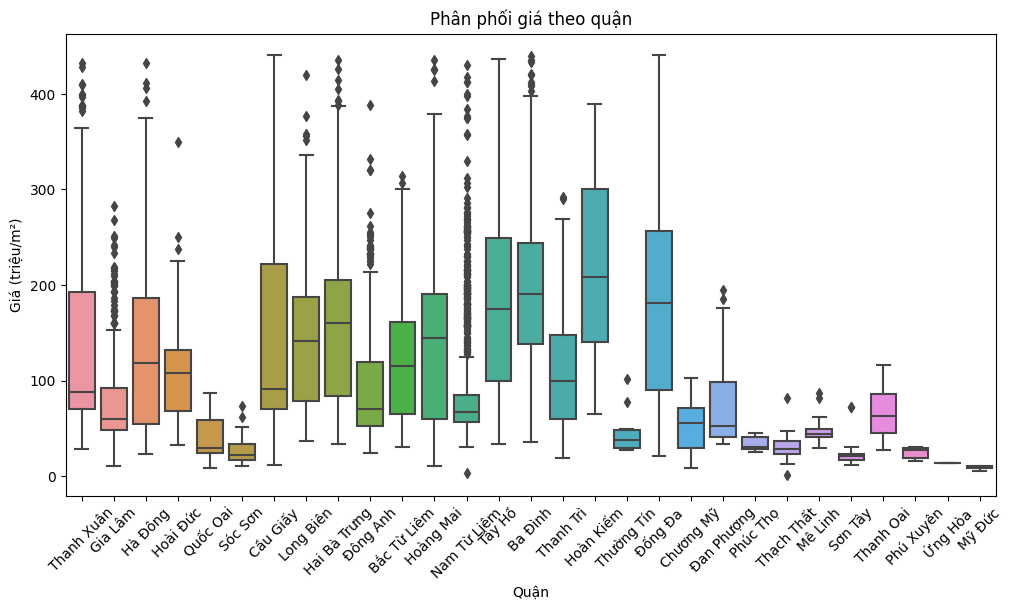

In [134]:
import seaborn as sns

# Vẽ boxplot cho phân phối giá theo quận
filtered_data = data[(data['Price'] >= 1) & (data['Price'] <= 2500)]

# Vẽ boxplot cho phân phối giá theo quận
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='District', y='Price')
plt.title('Phân phối giá theo quận')
plt.xticks(rotation=45)
plt.xlabel('Quận')
plt.ylabel('Giá (triệu/m²)')
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

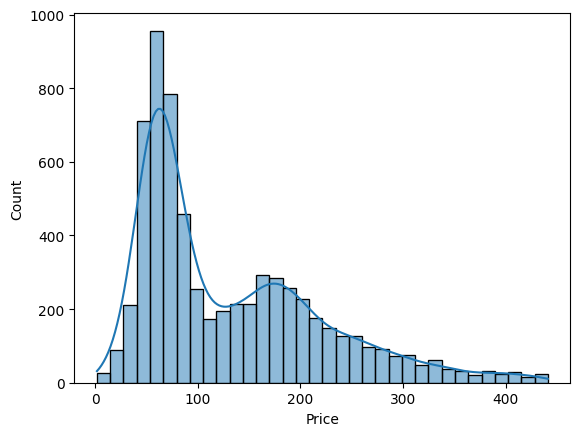

In [135]:
#Phân bổ giá nhà
sns.histplot(data['Price'], kde=True)

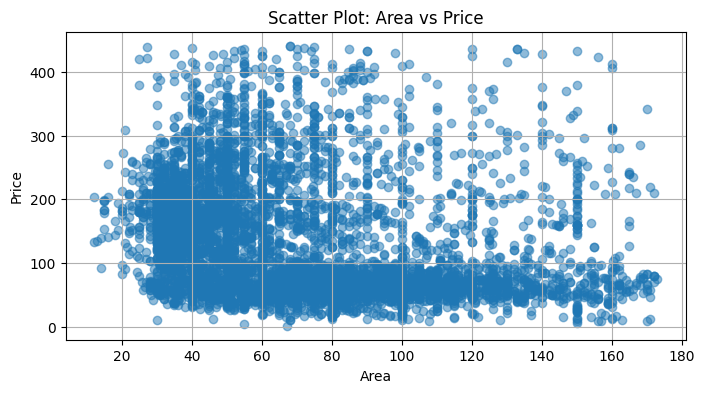

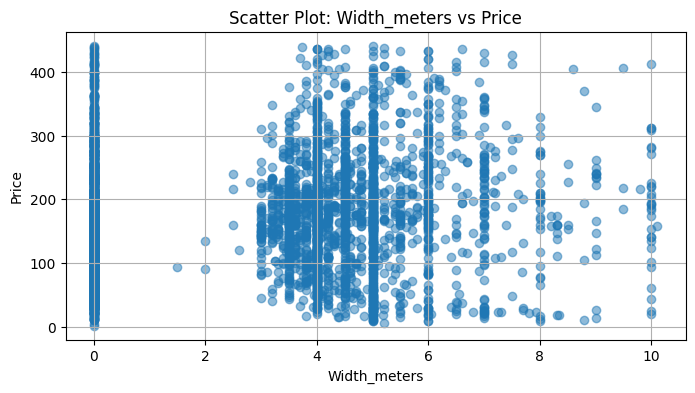

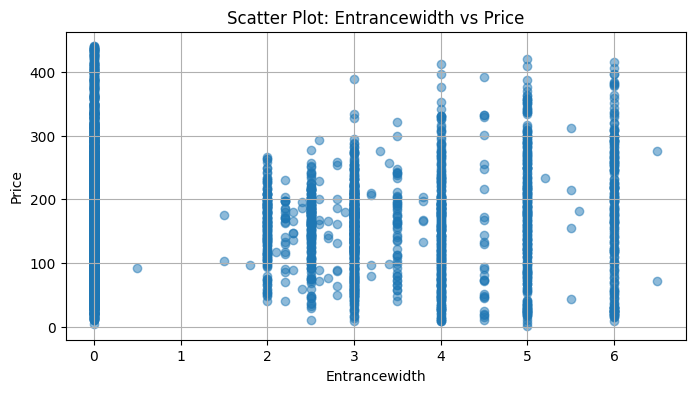

In [136]:
# List of numerical features to plot against 'Price'
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
numerical_features = numerical_features.drop('Price', errors='ignore')

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    plt.scatter(data[feature], data['Price'], alpha=0.5)
    plt.title(f'Scatter Plot: {feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

In [137]:
# numerical_cols = data.select_dtypes(include=[np.number]).columns

# # Tính ma trận tương quan
# corr_matrix = data[numerical_cols].corr()

# # Vẽ biểu đồ heatmap
# plt.figure(figsize=(8, 6)) 
# sns.heatmap(
#     corr_matrix, 
#     annot=True, 
#     fmt='.2f', 
#     cmap='coolwarm', 
#     linewidths=0.5, 
#     cbar=True
# )

# plt.title('Correlation Heatmap', fontsize=16)
# plt.xticks(rotation=45, fontsize=10) 
# plt.yticks(fontsize=10)
# plt.show()

In [138]:
# data.hist(figsize=(20,30))
# plt.show()

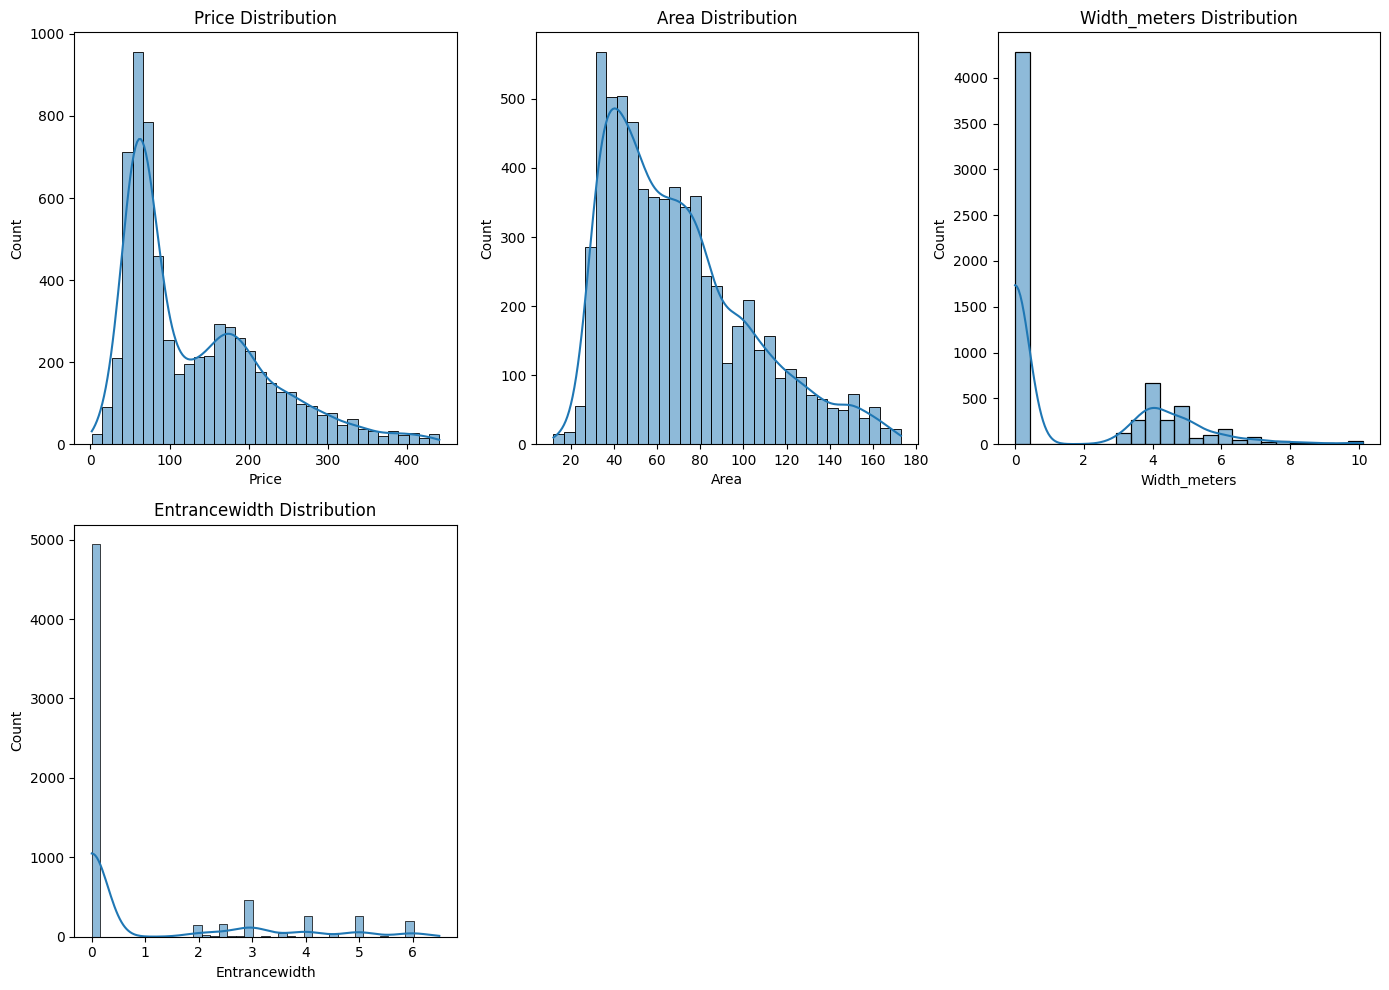

In [139]:
import math

# Vẽ biểu đồ phân phối (histogram) với KDE (Kernel Density Estimate) cho mỗi đặc trưng 

# Danh sách các đặc trưng số
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
# Số cột cho các subplots
n_cols = 3
# Tính số lượng hàng cần thiết để phù hợp với tất cả các đặc trưng số
n_rows = math.ceil(len(numeric_features) / n_cols)
# Tạo grid các subplots với số lượng hàng và cột đã tính toán
# figsize điều chỉnh kích thước tổng thể của figure (chiều rộng, chiều cao)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows * 5))
# Làm phẳng grid các axes thành một mảng 1D để dễ dàng truy cập
axes = axes.flatten()
# Duyệt qua các đặc trưng số và vẽ histogram cho mỗi đặc trưng
for i, column in enumerate(numeric_features):
    # Vẽ histogram với kernel density estimate (KDE) cho mỗi đặc trưng
    sns.histplot(data=data[column], ax=axes[i], kde=True)
    axes[i].set_title(f'{column} Distribution')
# Xóa các axes không sử dụng
# Nếu số lượng đặc trưng số ít hơn số lượng subplots, loại bỏ các axes thừa
for j in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[j])
# Điều chỉnh layout của các subplots để tránh bị chồng lấn
plt.tight_layout()

plt.show()

In [140]:
# plt.figure(figsize=(25, 5))
# sns.pairplot(data)
# plt.show()

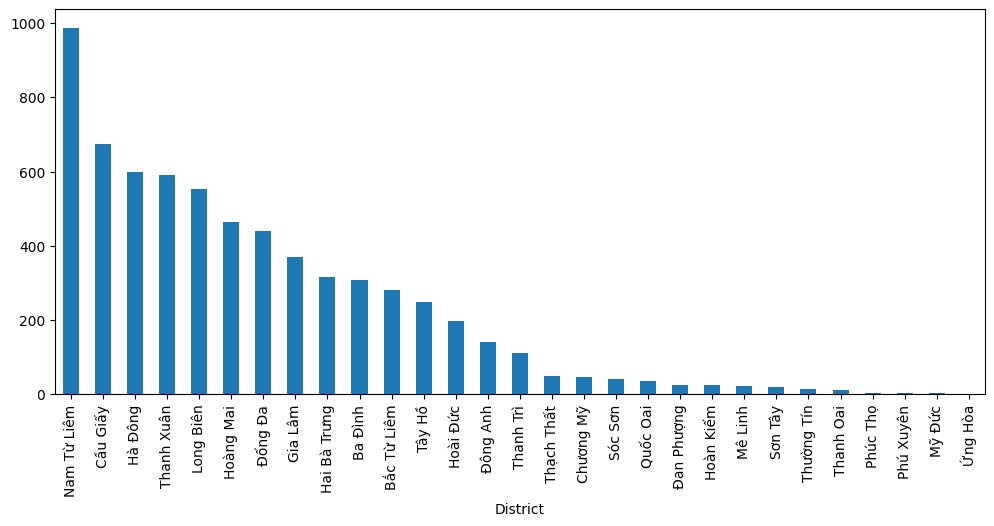

In [141]:
# Phân bổ số lượng tin bán theo từng Quận/Huyện
data['District'].value_counts().plot(kind='bar', figsize=(12,5))
plt.show()

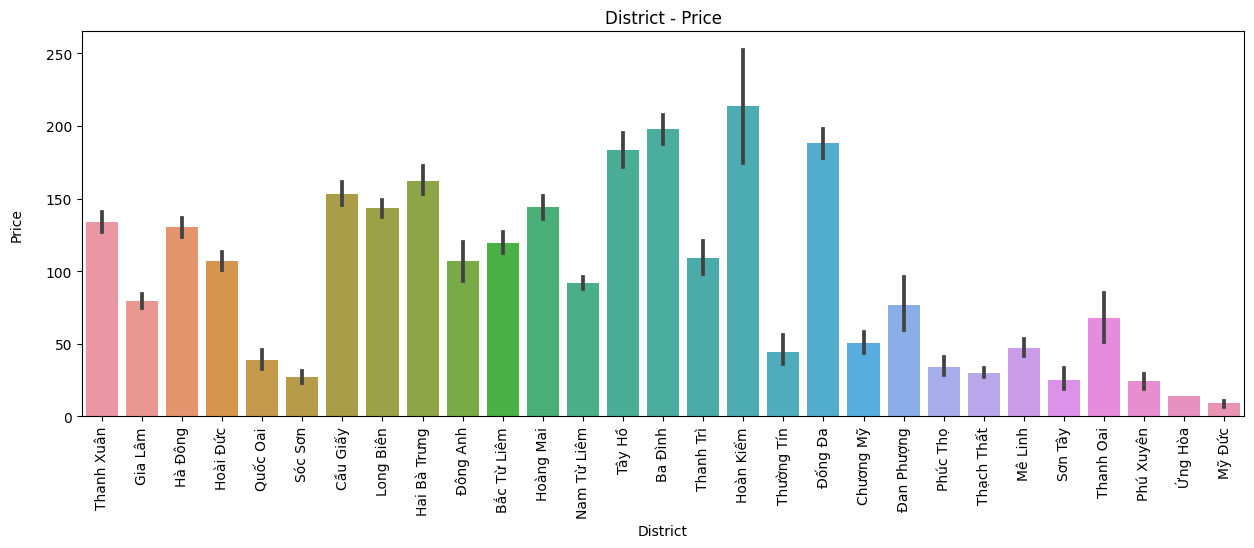

In [142]:
# Phân bổ giá bán theo từng Quận/Huyện
plt.figure(figsize=(15, 5))
sns.barplot(x = data['District'], y = data['Price'])
plt.xticks( horizontalalignment="center",rotation = 90 )
plt.xlabel("District")
plt.title("District - Price")
plt.ylabel("Price\n")

plt.show()

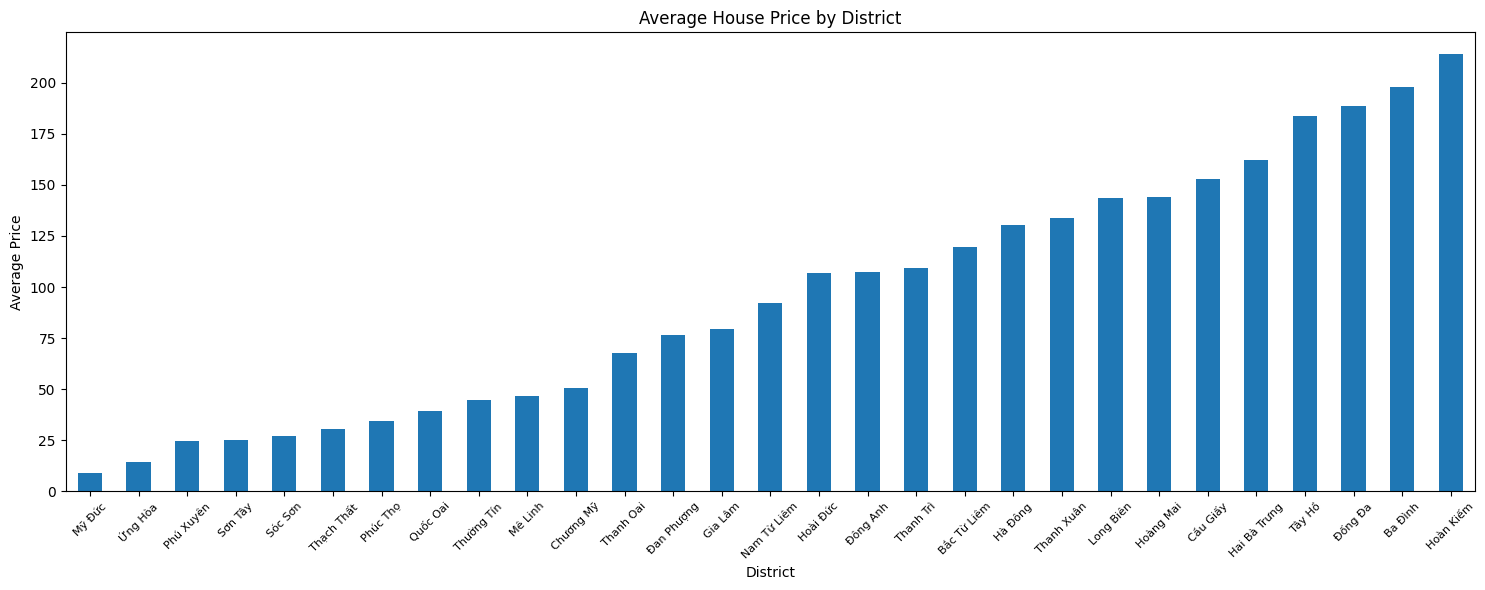

In [143]:
# Trung bình giá bán của từng Quận/Huyện
avg_price_by_district = data.groupby('District')['Price'].mean().sort_values()
plt.figure(figsize=(15, 6))
avg_price_by_district.plot(kind='bar')
plt.title('Average House Price by District')
plt.xlabel('District')
plt.ylabel('Average Price')
plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()

plt.show()

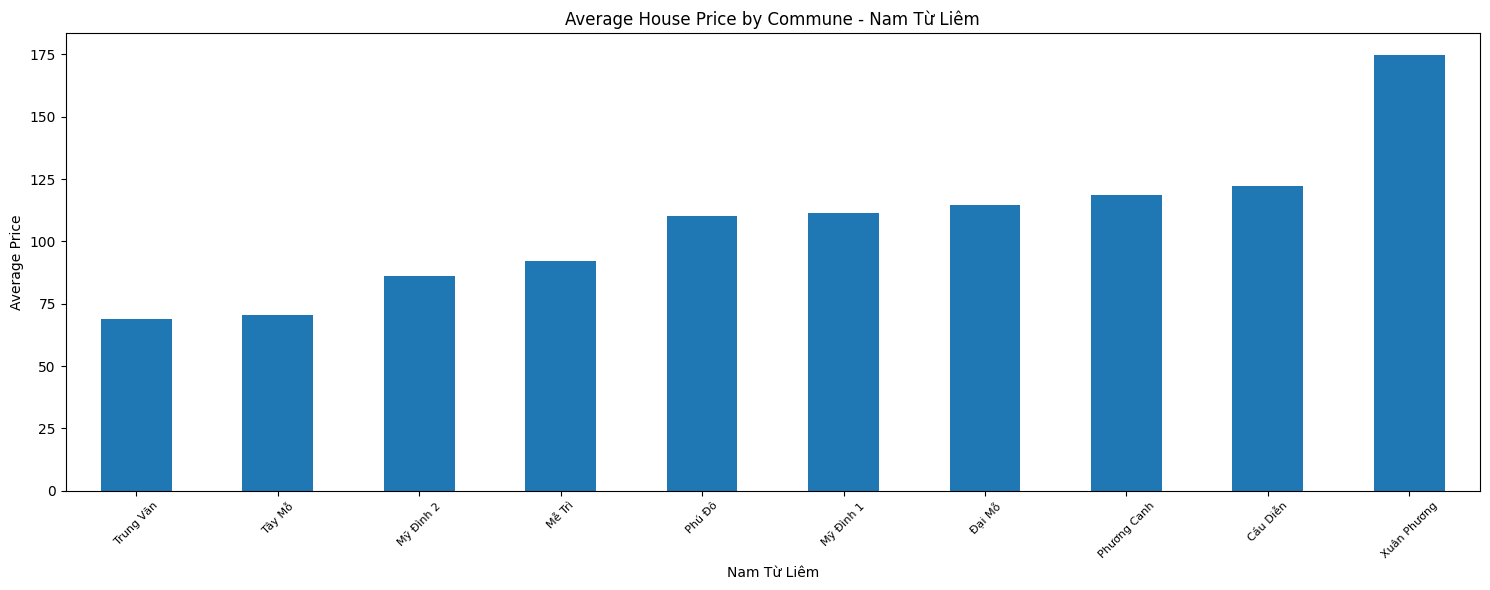

In [144]:
# Trung bình giá bán của từng Quận/Huyện
avg_price_by_district = data[data['District'] == 'Nam Từ Liêm'].groupby('Commune')['Price'].mean().sort_values()
plt.figure(figsize=(15, 6))
avg_price_by_district.plot(kind='bar')
plt.title('Average House Price by Commune - Nam Từ Liêm')
plt.xlabel('Nam Từ Liêm')
plt.ylabel('Average Price')
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()

plt.show()

# **Model**

In [145]:
data.to_csv('Formatted_data.csv', encoding='utf-8-sig')
data.head()

,Title,Address,Commune,District,PostingDate,PostType,Price,Area,Direction,Bedrooms,Bathrooms,Floors,Width_meters,Legal,Interior,Entrancewidth
0,"BÁN NHÀ NGUYỄN XIỂN THANH XUÂN, PHÂN LÔ OTO TR...","Đường Nguyễn Xiển, Phường Thanh Xuân Nam, Than...",Thanh Xuân Nam,Thanh Xuân,2024-12-21,Nhà,344.23,52.0,0,0,0,0,0.00,Hợp đồng mua bán,Không có,0.0
1,"Bán Nhà Thiên Đức, Gia Lâm, Hà Nội: Nội Thất T...","Hà Huy Tập, Xã Yên Viên, Gia Lâm, Hà Nội",Yên Viên,Gia Lâm,2024-12-21,Nhà,74.17,120.0,0,5,4,5,4.00,Sổ đỏ/Sổ hồng,Không có,5.0
2,"Siêu rẻ, chỉ nhỉnh 6ty sở hữu ngay nhà DT47M2X...","Đường Chiến Thắng, Phường La Khê, Hà Đông, Hà Nội",La Khê,Hà Đông,2024-12-21,Nhà,135.11,47.0,Tây - Bắc,4,3,5,3.50,Sổ đỏ/Sổ hồng,Cơ bản,3.0
3,Chủ bán nhanh chung cư 2 ngủ 2VS Thăng Long Vi...,"Thăng Long Capital, Xã An Khánh, Huyện Hoài Đứ...",None,Hoài Đức,2024-12-21,Chung cư,44.35,62.0,0,2,2,1,0.00,Sổ đỏ/Sổ hồng,Đầy đủ,0.0
4,Cuối năm cắt lỗ gần 300 triệu giá mềm lô đất 8...,"Xã Phú Mãn, Quốc Oai, Hà Nội",Phú Mãn,Quốc Oai,2024-12-21,Đất,34.44,81.0,Tây - Nam,0,0,0,5.06,Sổ đỏ/Sổ hồng,Không có,5.0


In [146]:
data.describe()

,PostingDate,Price,Area,Bedrooms,Bathrooms,Floors,Width_meters,Entrancewidth
count,6588,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000
mean,2024-12-16 19:49:30.491803136,131.493497,69.973238,2.346084,1.903764,2.368701,1.670378,0.932043
min,2024-11-18 00:00:00,1.650000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-12-15 00:00:00,61.530000,43.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,2024-12-18 00:00:00,95.000000,63.000000,3.000000,2.000000,1.000000,0.000000,0.000000
75%,2024-12-20 00:00:00,186.110000,89.000000,3.000000,3.000000,5.000000,4.000000,1.500000
max,2024-12-21 00:00:00,441.180000,173.000000,7.000000,6.000000,10.000000,10.110000,6.500000
std,NaN,89.039517,32.856050,1.615214,1.576595,2.095178,2.406924,1.729778


In [147]:
data.fillna(0, inplace=True)
data= data.drop(columns=['Title', 'Address', 'PostingDate'],axis=1)
data.head(2)

,Commune,District,PostType,Price,Area,Direction,Bedrooms,Bathrooms,Floors,Width_meters,Legal,Interior,Entrancewidth
0,Thanh Xuân Nam,Thanh Xuân,Nhà,344.23,52.0,0,0,0,0,0.0,Hợp đồng mua bán,Không có,0.0
1,Yên Viên,Gia Lâm,Nhà,74.17,120.0,0,5,4,5,4.0,Sổ đỏ/Sổ hồng,Không có,5.0


In [148]:
# One-Hot Encoding cho các cột không phải kiểu số
categorical_columns = ['Commune', 'PostType', 'District', 'Direction', 'Legal', 'Interior']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [149]:
data['Price'] = np.log1p(data['Price'])

In [150]:
data.head()

,Price,Area,Bedrooms,Bathrooms,Floors,Width_meters,Entrancewidth,Commune_An Khánh,Commune_An Phú,Commune_An Thượng,...,Direction_Tây - Bắc,Direction_Tây - Nam,Direction_Đông,Direction_Đông - Bắc,Direction_Đông - Nam,Legal_Sổ đỏ/Sổ hồng,Legal_Vi bằng,Interior_Cơ bản,Interior_Không có,Interior_Đầy đủ
0,5.844211,52.0,0,0,0,0.00,0.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,4.319752,120.0,5,4,5,4.00,5.0,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,4.913463,47.0,4,3,5,3.50,3.0,False,False,False,...,True,False,False,False,False,True,False,True,False,False
3,3.814410,62.0,2,2,1,0.00,0.0,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,3.567841,81.0,0,0,0,5.06,5.0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [151]:
# Chọn các cột đặc trưng và mục tiêu
X = data.loc[:, data.columns != 'Price']
y = data['Price']
X

,Area,Bedrooms,Bathrooms,Floors,Width_meters,Entrancewidth,Commune_An Khánh,Commune_An Phú,Commune_An Thượng,Commune_An Tiến,...,Direction_Tây - Bắc,Direction_Tây - Nam,Direction_Đông,Direction_Đông - Bắc,Direction_Đông - Nam,Legal_Sổ đỏ/Sổ hồng,Legal_Vi bằng,Interior_Cơ bản,Interior_Không có,Interior_Đầy đủ
0,52.0,0,0,0,0.00,0.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,120.0,5,4,5,4.00,5.0,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,47.0,4,3,5,3.50,3.0,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
3,62.0,2,2,1,0.00,0.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,81.0,0,0,0,5.06,5.0,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6583,85.0,6,3,4,4.80,0.0,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
6584,91.0,3,2,1,0.00,0.0,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
6585,46.0,3,3,7,4.00,6.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
6586,80.0,3,2,1,0.00,0.0,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [152]:
# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test

,Area,Bedrooms,Bathrooms,Floors,Width_meters,Entrancewidth,Commune_An Khánh,Commune_An Phú,Commune_An Thượng,Commune_An Tiến,...,Direction_Tây - Bắc,Direction_Tây - Nam,Direction_Đông,Direction_Đông - Bắc,Direction_Đông - Nam,Legal_Sổ đỏ/Sổ hồng,Legal_Vi bằng,Interior_Cơ bản,Interior_Không có,Interior_Đầy đủ
2718,36.0,4,4,4,0.00,3.0,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2654,85.0,3,2,1,0.00,0.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1666,130.0,3,2,1,0.00,0.0,False,False,False,False,...,False,False,False,True,False,True,False,False,False,True
5153,72.0,2,2,1,0.00,0.0,False,False,False,False,...,True,False,False,False,False,True,False,False,False,True
5653,55.0,0,0,4,0.00,0.0,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2656,34.8,0,0,0,3.82,0.0,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1934,60.0,0,0,0,0.00,0.0,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
5397,37.0,2,1,1,0.00,0.0,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
677,80.0,2,2,1,0.00,0.0,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [153]:
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet,
    SGDRegressor,
    BayesianRidge
)
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor,
    StackingRegressor
)
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# **Random Forest**

In [154]:
model_randomforest = RandomForestRegressor(
        n_estimators=150,  # Tăng số lượng cây
        max_depth=15,  # Tăng chiều sâu để học tốt hơn
        min_samples_split=4,  # Tăng min_samples_split
        min_samples_leaf=2,  # Tăng min_samples_leaf để ổn định hơn
        max_features='sqrt',  # Dùng sqrt để giảm overfitting
        random_state=42
    )

model_randomforest.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=150, random_state=42)

In [155]:
joblib.dump(model_randomforest, 'model_randomforest.pkl')  # Lưu mô hình sau khi huấn luyện

['model_randomforest.pkl']

In [156]:
y_pred_rf = model_randomforest.predict(X_test)

In [157]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R2 Score: {r2_rf}")

MAE: 0.26104963817785876
MSE: 0.12102018077762396
RMSE: 0.34787954923741055
R2 Score: 0.7383502713910075


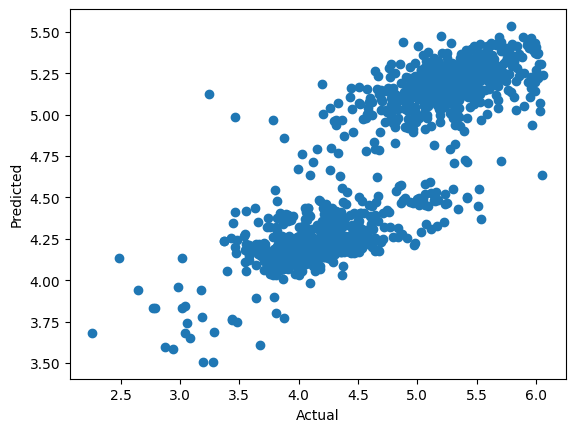

In [158]:
plt.scatter(y_test,y_pred_rf);
plt.xlabel('Actual');
plt.ylabel('Predicted');

# **Gradient Boosting**

In [159]:
# Model GradientBoosting
model_gradientboosting = GradientBoostingRegressor(
    n_estimators=800,  # Tăng số lượng cây để giảm sai số
    learning_rate=0.03,  # Giảm learning rate để tăng độ chính xác
    max_depth=10,  # Tăng chiều sâu để mô hình hóa phức tạp hơn
    min_samples_split=4,  # Tăng min_samples_split để giảm overfitting
    min_samples_leaf=2,  # Tăng min_samples_leaf để ổn định hơn
    subsample=0.9,  # Tăng tỷ lệ mẫu để bao quát tốt hơn
    max_features='sqrt',  # Sử dụng sqrt để giảm overfitting
    random_state=42
)

# Huấn luyện mô hình
model_gradientboosting.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=10, max_features='sqrt',
                          min_samples_leaf=2, min_samples_split=4,
                          n_estimators=800, random_state=42, subsample=0.9)

In [160]:
joblib.dump(model_gradientboosting, 'model_gradientboosting.pkl')  # Lưu mô hình sau khi huấn luyện

['model_gradientboosting.pkl']

In [161]:
y_pred_gb = model_gradientboosting.predict(X_test)

In [162]:
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"MAE: {mae_gb}")
print(f"MSE: {mse_gb}")
print(f"RMSE: {rmse_gb}")
print(f"R2 Score: {r2_gb}")

MAE: 0.19184260174250178
MSE: 0.07214488963346681
RMSE: 0.2685980075009247
R2 Score: 0.8440203057719071


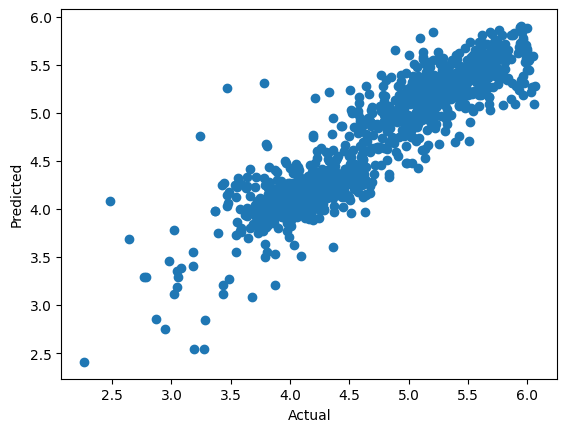

In [163]:
plt.scatter(y_test,y_pred_gb);
plt.xlabel('Actual');
plt.ylabel('Predicted');

# **Stacking model**

In [164]:
# Các base models
base_models = [
    ('gbm', GradientBoostingRegressor(
        n_estimators=800,  # Tăng số lượng cây để giảm sai số
        learning_rate=0.03,  # Giảm learning rate để tăng độ chính xác
        max_depth=10,  # Tăng chiều sâu để mô hình hóa phức tạp hơn
        min_samples_split=4,  # Tăng min_samples_split để giảm overfitting
        min_samples_leaf=2,  # Tăng min_samples_leaf để ổn định hơn
        subsample=0.9,  # Tăng tỷ lệ mẫu để bao quát tốt hơn
        max_features='sqrt',  # Sử dụng sqrt để giảm overfitting
        random_state=42
    )),
    ('rf', RandomForestRegressor(
        n_estimators=150,  # Tăng số lượng cây
        max_depth=15,  # Tăng chiều sâu để học tốt hơn
        min_samples_split=4,  # Tăng min_samples_split
        min_samples_leaf=2,  # Tăng min_samples_leaf để ổn định hơn
        max_features='sqrt',  # Dùng sqrt để giảm overfitting
        random_state=42
    )),
    ('xgb', XGBRegressor(
        n_estimators=500,  # Tăng số lượng cây để cải thiện hiệu suất
        max_depth=10,  # Tăng chiều sâu
        learning_rate=0.03,  # Giảm learning rate
        subsample=0.85,  # Giữ lại nhiều dữ liệu hơn trong mỗi cây
        colsample_bytree=0.8,  # Tăng mức đa dạng của mỗi cây
        random_state=42
    )),
]

# Meta model
meta_model = LinearRegression(
    n_jobs=-1  # Sử dụng tất cả các luồng (cpu/gpu)
)

# meta_model = Ridge(alpha=1.0)

# Stacking Regressor
model_stacking = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,  # Thực hiện cross-validation để tăng độ chính xác
    n_jobs=-1  # Sử dụng tất cả các luồng (cpu/gpu)
)

# Huấn luyện mô hình
model_stacking.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('gbm',
                               GradientBoostingRegressor(learning_rate=0.03,
                                                         max_depth=10,
                                                         max_features='sqrt',
                                                         min_samples_leaf=2,
                                                         min_samples_split=4,
                                                         n_estimators=800,
                                                         random_state=42,
                                                         subsample=0.9)),
                              ('rf',
                               RandomForestRegressor(max_depth=15,
                                                     max_features='sqrt',
                                                     min_samples_leaf=2,
                                                     min_samples_split=4,
                                                     n_estimators=150,
                                                     random_state=42)),
                              ('xgb',...
                                            interaction_constraints=None,
                                            learning_rate=0.03, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=500, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

In [165]:
joblib.dump(model_stacking, 'model_stacking.pkl')  # Lưu mô hình sau khi huấn luyện

['model_stacking.pkl']

In [166]:
y_pred_st = model_stacking.predict(X_test)

In [167]:
mae_st = mean_absolute_error(y_test, y_pred_st)
mse_st = mean_squared_error(y_test, y_pred_st)
rmse_st = np.sqrt(mse_st)
r2_st = r2_score(y_test, y_pred_st)

print(f"MAE: {mae_st}")
print(f"MSE: {mse_st}")
print(f"RMSE: {rmse_st}")
print(f"R2 Score: {r2_st}")

MAE: 0.18781964747423568
MSE: 0.07069351205731296
RMSE: 0.26588251551637043
R2 Score: 0.8471582332354897


Text(0, 0.5, 'Predicted')

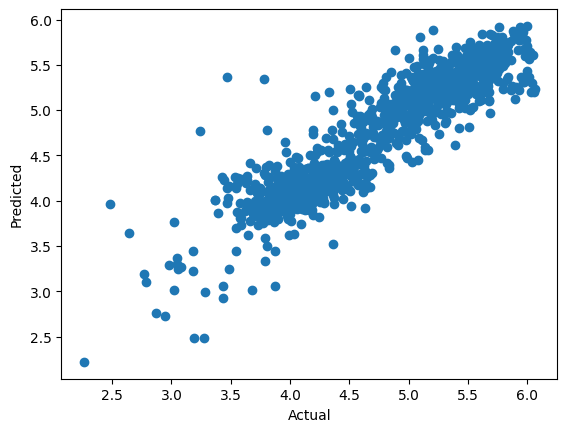

In [168]:
plt.scatter(y_test,y_pred_st)
plt.xlabel('Actual')
plt.ylabel('Predicted')


# **Compare model**

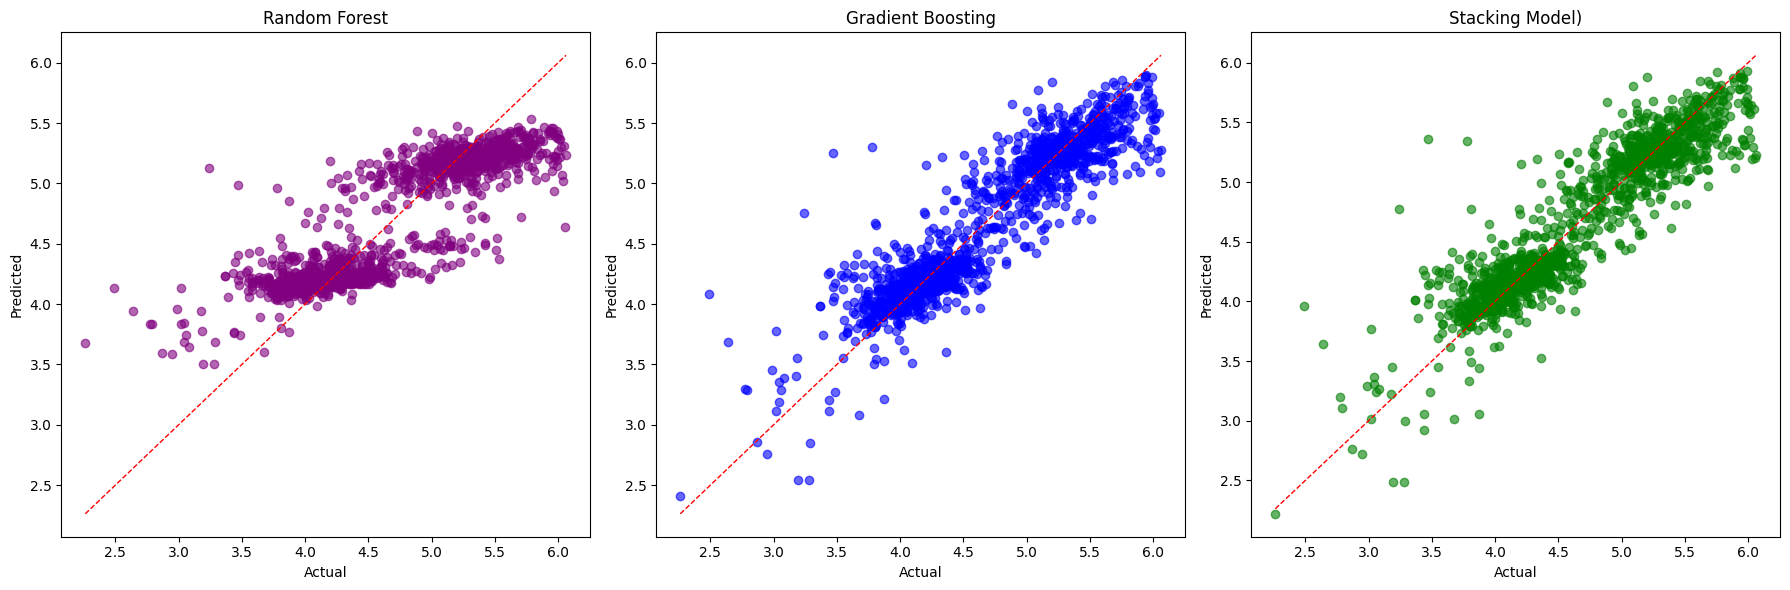

In [169]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Biểu đồ 1: Random Forest
axes[0].scatter(y_test, y_pred_rf, alpha=0.6, color='purple')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=1)
axes[0].set_title("Random Forest")
axes[0].set_xlabel("Actual")
axes[0].set_ylabel("Predicted")

# Biểu đồ 2: Dự đoán từ Gradient Boosting
axes[1].scatter(y_test, y_pred_gb, alpha=0.6, color='blue')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=1)
axes[1].set_title("Gradient Boosting")
axes[1].set_xlabel('Actual')
axes[1].set_ylabel('Predicted')

# Biểu đồ 3: Dự đoán từ Stacking Model
axes[2].scatter(y_test, y_pred_st, alpha=0.6, color='green')
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=1)
axes[2].set_title('Stacking Model)')
axes[2].set_xlabel('Actual')
axes[2].set_ylabel('Predicted')

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()


In [170]:
import pandas as pd
import numpy as np
import joblib

# Dữ liệu mới để dự đoán
new_data = {
    'Area': [127],
    'Bedrooms': [0],
    'Bathrooms': [0],
    'Commune': ['Minh Trí'],
    'PostType': ['Đất'],
    'District': ['Sóc Sơn'],
    'Direction': ['0'],
    'Legal': ['Hợp đồng mua bán'],
    'Interior': ['Không có'],
    'Width_meters': [5.48],
    'Floors': [0],
    'Entrancewidth': [0]
}

new_df = pd.DataFrame(new_data)
categorical_columns = ['Commune', 'PostType', 'District', 'Direction', 'Legal', 'Interior']
# Mã hóa dữ liệu mới bằng cách sử dụng cùng một cột phân loại
new_df = pd.get_dummies(new_df, columns=categorical_columns, drop_first=False)

# Đảm bảo rằng tất cả các cột trong dữ liệu mới có mặt trong dữ liệu huấn luyện
missing_cols = set(X.columns) - set(new_df.columns)
for col in missing_cols:
    new_df[col] = 0
new_df = new_df[X.columns]  # Sắp xếp lại các cột theo đúng thứ tự của X
num_columns = new_df.columns.size  # hoặc len(new_df.columns)
print("Số lượng cột:", num_columns)
new_df.to_csv('columns.csv')

# Tải mô hình đã huấn luyện
model_rf = joblib.load('model_randomforest.pkl')
model_gb = joblib.load('model_gradientboosting.pkl')
model_st = joblib.load('model_stacking.pkl')
# Dự đoán giá trị log
log_prediction_rf = model_rf.predict(new_df)
log_prediction_gb = model_gb.predict(new_df)
log_prediction_st = model_st.predict(new_df)

# Chuyển đổi từ log về giá trị gốc
original_prediction_rf = np.expm1(log_prediction_rf)
original_prediction_gb = np.expm1(log_prediction_gb)
original_prediction_st = np.expm1(log_prediction_st)
# In kết quả dự đoán gốc
print("Kết quả dự đoán - RF:", original_prediction_rf[0])
print("Kết quả dự đoán - GB:", original_prediction_gb[0])
print("Kết quả dự đoán - ST:", original_prediction_st[0])


Số lượng cột: 370
Kết quả dự đoán - RF: 35.9995368090329
Kết quả dự đoán - GB: 18.24504660818807
Kết quả dự đoán - ST: 15.049844857358924


In [171]:
pred_df=pd.DataFrame({'Actual Value':np.expm1(y_test),'RF':np.expm1(y_pred_rf),'GB':np.expm1(y_pred_gb), 'ST': np.expm1(y_pred_st) })
pred_df.to_csv('compare.csv')
# pred_df = pred_df.sort_values(by='Actual Value', ascending = True)
pred_df

,Actual Value,RF,GB,ST
2718,122.22,136.382959,100.908735,98.058143
2654,62.35,63.591159,57.623247,57.936963
1666,50.00,60.035412,48.973429,47.784307
5153,125.00,69.838777,77.219383,80.380825
5653,134.18,184.960771,194.570725,191.429368
...,...,...,...,...
2656,91.95,87.156261,99.551237,103.021758
1934,146.67,88.241099,143.420880,167.122151
5397,67.57,78.717564,98.929388,96.225752
677,50.62,66.897143,61.083977,60.239460


In [172]:
pred_df.describe()

,Actual Value,RF,GB,ST
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,131.009279,117.327567,125.372182,126.326224
std,89.576273,58.217485,75.672682,77.662105
min,8.600000,32.319427,10.118755,8.202586
25%,60.192500,65.372838,62.856179,62.825464
50%,90.865000,80.834479,85.468067,86.065247
75%,186.420000,176.178289,186.996752,186.521339
max,428.570000,252.787621,364.942950,374.982102
